# Import Data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
mclab = os.getenv('MCLAB')
fname = os.path.join(mclab, 'cegs_ase_paper/pipeline_output/qsim_bayesian/qsim_bias_wide.csv')
dat = pd.read_csv(fname, index_col='fusion_id')
dat[:3]

(63181, 70)

## Mask data for plotting

In [3]:
# Pull out only the columns with qsim value
mk = dat.ix[:,1:-1]

# Turn qsim values into binary values
maskLine = mk > 0.5
maskTester = mk < 0.5
mask1 = mk == 0.5
mask2 = mk.isnull()

mk[mask1] = 0
mk[mask2] = 0
mk[maskLine] = 1
mk[maskTester] = -1
mk[:3]

,r101,r109,r136,r149,r181,r208,r21,r217,r228,r280,...,w47,w52,w55,w59,w64,w67,w68,w74,w76,w79
fusion_id,,,,,,,,,,,,,,,,,,,,,
F10001_SI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F10005_SI,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
F10009_SI,1,1,1,1,1,0,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1


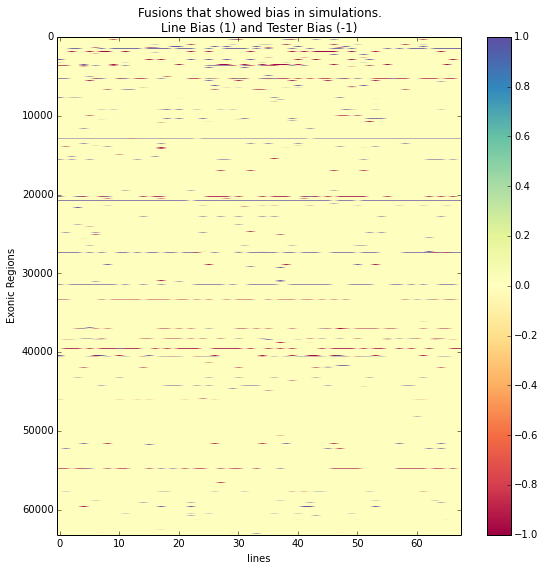

In [5]:
fig = plt.figure(figsize=(8,8))
plt.imshow(mk, aspect='auto', cmap=plt.cm.Spectral)
plt.xlabel('lines')
plt.ylabel('Exonic Regions')
plt.title(u'Fusions that showed bias in simulations.\nLine Bias (1) and Tester Bias (-1)')
plt.colorbar()
plt.tight_layout()
plt.savefig(os.path.join(mclab,'cegs_ase_paper/pipeline_output/qsim_bayesian/qsim_bias_matrix.png'))